In [10]:
import numpy as np
import matplotlib.pyplot as plt
# If you have latex in your computer, set this to True.
# Otherwise, just keep it False as in this code.
plt.rcParams['text.usetex'] = False

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Classification with multiple features

In this self-study notebook, we study logistic regression problem with multiple input features. The model function is then given by
$$f_{\vec{w}, b}(\vec{x}) = \frac{1}{1 + \exp(-(\vec{w} \cdot\vec{x} + b))}$$

The cost function that needs to be minimized for the model parameters $\vec{w}, b$ is given by
$$J(\vec{w}, b) = -\frac{1}{m}\sum\limits_{i=1}^{m}\bigg\{ y^{(i)}\log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1 - y^{(i)}) \log(1 - f_{\vec{w},b}(\vec{x}^{(i)})) \bigg\}$$

The gradient descent is given by

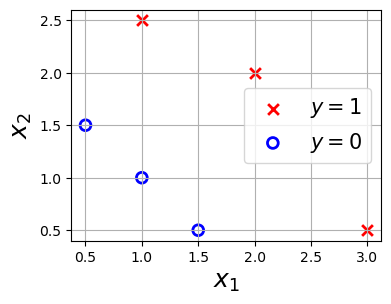

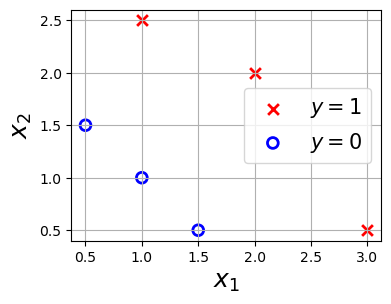

In [11]:
X_train = np.array([[0.5, 1.5], 
                     [1,   1], 
                     [1.5, 0.5], 
                     [3, 0.5], 
                     [2, 2], 
                     [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

def visual_data(X, y):
    pos = (y == 1)
    neg = (y == 0)
    fig = plt.figure(figsize=(4, 3))
    plt.scatter(X[pos,0], X[pos,1], marker='x', color='r', label='$y = 1$', s=60, lw=2)
    plt.scatter(X[neg,0], X[neg,1], marker='o', facecolor='none', label='$y = 0$', \
                s=60, edgecolors='b', lw=2)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18)
    return fig
    
visual_data(X_train, y_train)

### Learning to use `interact`

Let us take this opportunity to learn something new in Python programming.

In [ ]:
# You should run this cell using anaconda or using google colab.
# Uncomment the code to run it.

# @interact(x=True, y=1.0)
# def g(x, y):
#     return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

### Plot decision boundary and interaction

In this example, you can use the slider to change the model parameters $w_1, w_2, b$ to examine the decision boundary. Try to change `w1`, `w2` and `b` until you see the decision boundary separates the positive data ($y = 1$) from the negative data ($y = 0$).

In [12]:
# @interact(w1=(-10, 12, 0.25), w2=(-10, 12, 0.5), b=(0, 10, 0.5))
def plot_decision_boundary(w1, w2, b, X_train=fixed(X_train), y_train=fixed(y_train)):
    pos = (y_train == 1)
    neg = (y_train == 0)
    plt.figure(figsize=(4, 3))
    plt.scatter(X_train[pos,0], X_train[pos,1], marker='x', color='r', label='$y = 1$', s=60, lw=2)
    plt.scatter(X_train[neg,0], X_train[neg,1], marker='o', facecolor='none', label='$y = 0$', \
                s=60, edgecolors='b', lw=2)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18)
    # To plot a line w1 x1 + w2 x2 + b = 0, we convert it to 
    # x2 = (b - w1 x1) / w2
    xx = np.array([X_train.min(), X_train.max()])
    yy = (b - w1 * xx) / w2
    plt.plot(xx, yy, 'm-', lw=2)

# Logistic regression using self-programmed gradient descent

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    # Compute the cost function
    lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
    cost = -(1/m) *( np.sum(lost_on_examples) )
    return cost

def compute_cost_grad(X_train, y_train, w, b):
    m = X_train.shape[0]
    z = np.dot(X_train, w) + b
    f_wb = sigmoid(z)
    err = f_wb - y_train
    dJ_dw = 1/m * np.dot(err, X_train)
    dJ_db = 1/m * np.sum(err)
    
    return dJ_dw, dJ_db

# Let us test the defined function
compute_cost_grad(X_train, y_train, w=np.array([0.5, 0.25]), b=0.1)

(array([0.18498124, 0.18249393]), 0.25902026920181037)

In [14]:
def gradient_descent(X_train, y_train, w_init, b_init, alpha, func_value, func_grad, tol=0.0001, maxiters=100):

    w = w_init
    b = b_init
    history = {'w': [], 'b': [], 'J': []}
    abs_diff = 1
    rel_diff = 1
    for step in range(maxiters):
        dJ_dw, dJ_db = func_grad(X_train, y_train, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        history['w'].append(w)
        history['b'].append(b)
        history['J'].append(func_value(X_train, y_train, w, b))
        
        # if convergence, break the iteration
        if step > 1:
            abs_diff = np.abs(history['J'][-1] - history['J'][-2])
            rel_diff = abs_diff / np.abs(np.abs(history['J'][-1]))
        if  abs_diff < tol or rel_diff < tol:
            print(f"Gradient descent converges at step {step}")
            print(f"Absolute difference: {abs_diff}")
            print(f"Relative difference: {rel_diff}")
            print(f"Cost function = {history['J'][-1]}")
            break
        
    return w, b, history

w_final = [9.57315037 9.37234968]
b_final = [-26.04788599]


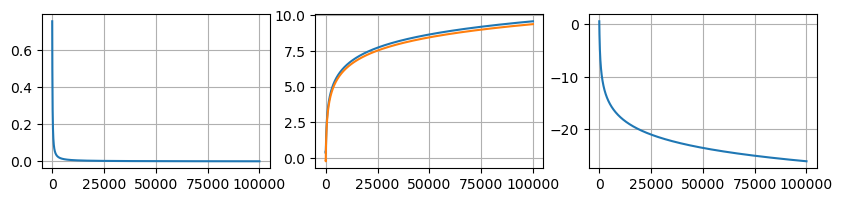

In [28]:
# Set seed so that we can reproduce the result.
np.random.seed(42)
w0 = np.random.randn(2)
b0 = np.random.randn(1)

w_GD, b_GD, history = gradient_descent(X_train, y_train, w_init=w0, b_init=b0, alpha=0.25, 
                                       func_value=compute_cost, func_grad=compute_cost_grad, tol=1e-10, maxiters=np.uint32(1e5))
print(f"w_final = {w_GD}")
print(f"b_final = {b_GD}")

fig, ax = plt.subplots(1, 3, figsize=(10, 2.0))
ax[0].plot(history['J']), ax[0].grid() 
ax[1].plot(history['w']), ax[1].grid()
ax[2].plot(history['b']), ax[2].grid()
plt.show()

Let us use the model parameters we have just obtained to plot the decision boundary!

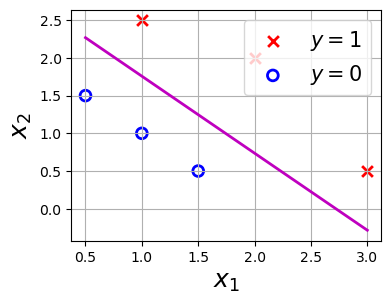

In [29]:
visual_data(X_train, y_train)
xx = np.array([X_train.min(), X_train.max()])
# Again, to plot w1*x1 + w2*x2 + b = 0, we need to convert it
# to x2 = -(w1*x1 + b)/w2
yy = -(w_GD[0]*xx + b_GD)/w_GD[1]
plt.plot(xx, yy, 'm-', lw=2)
plt.show()
# It appears as a perfect decision boundary. Great!

# Logistic regression using `sklearn`

The class `LogisticRegression` can be imported from `sklearn.linear_model`. Yes, you are reading it correctly. Although as for logistic regression we use the nonlinear sigmoid function $g(z) = \frac{1}{(1 + \exp(-z))}$, in the nutshell a linear function $w x + b$ is still fed into the sigmoid function. For this reason, the decision boundary expresses the linear relationship between the input features, namely $\vec{w} \cdot \vec{x} + b = \mathrm{constant}$. If we want to express decision boundaries with curve, we apply the polynomial expression into the sigmoid function. Again, polynomial expression can be understood as linear model with the linear relationship between the variables $x_1, x_2, \ldots$ and its exponents. 

## Create and fit the model

In [84]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty=None, tol=1e-6, max_iter=np.uint32(1e7), 
                              random_state=42, solver='sag')
lr_model.fit(X_train, y_train)
print(lr_model.coef_, lr_model.intercept_)

[[12.6249161  12.42409086]] [-34.44220213]


## Make prediction using the trained model

In [65]:
y_pred = lr_model.predict(X_train)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


We can calcluate the accuracy of the model by calling the `score` function.

In [66]:
print("Accuracy on training set:", lr_model.score(X_train, y_train))

Accuracy on training set: 1.0


## Comparison with the results using hand-written gradient descent

In [67]:
w = lr_model.coef_
b = lr_model.intercept_
print(f"w = {w}")
print(f"b = {b}")

print(f"w_GD = {w_GD}")
print(f"b_GD = {b_GD}")

print(f"w / w_GD = {w/w_GD}")
print(f"b / b_GD = {b/b_GD}")

w = [[29.00948079 28.68144408]]
b = [-79.11470281]
w_GD = [9.57319974 9.37239905]
b_GD = [-26.04802181]
w / w_GD = [[3.03028053 3.06020304]]
b / b_GD = [3.03726338]


We see that the parameter weights $\vec{w}$ and the intercept $b$ obtained by self-programmed gradient descent by using the library are different. The difference may come from multiple reasons but the following is just my opinion.

1. The library has used some sort normalization on the weight parameters. This cannot be easily seen without seeing the code in the library.
2. The tolerance for stopping the iteration algorithm and the stopping criteria can be slighly different.
3. Last but not least, the algorithm for the minimization problem implemented in the library is not the simple version of the gradient descent. Indeed, it is likely an advanced optimization method.

However, it is important to see that if we represent the decision boundaries obtained by two approaches by two equations

$$w_{1}^{\mathrm{sk}} x_1 + w_{2}^{\mathrm{sk}} x_2 + b^\mathrm{sk} = 0$$
$$w_{1}^{\mathrm{gd}} x_1 + w_{2}^{\mathrm{gd}} x_2 + b^\mathrm{gd} = 0$$

where $\mathrm{sk}$ stands for the solution obtained by `sklearn` library and $\mathrm{gd}$ for our self-programmed results, then these two lines are almost identical. In fact, we have the ratios
$$\frac{w_{1}^{\mathrm{sk}}}{w_{1}^{\mathrm{gd}}} \approx \frac{w_{2}^{\mathrm{sk}}}{w_{2}^{\mathrm{gd}}} \approx \frac{b^{\mathrm{sk}}}{b^{\mathrm{gd}}}.$$

### Remark

As we can see the parameter $w$ obtained from the `sklearn` is a 2-dimensional array while the our self-programmed result $w$ is just a 1-dimensional array. The reason for this difference is that the `sklearn.LogisticRegression` accept multi-category prediction problem, that is not only binary classification. 

1. Assume that the number of categories is $N$, the number of rows of $\mathbf{W}$ matrix is $N$.
2. If there are two categories $N=2$, namely binary classification, the number of rows of $\mathbf{W}$ matrix is $N-1$.
3. Assume that the number of input features is $n$, the number of columns of $\mathbf{W}$ matrix is $n$. 

Similarly, we also notice that the attribute `intercept_` from `sklearn.LogisticRegression` is a 1-dimensional array. The size of the array $\mathbf{b}$ is equal to the number of categories in the problem. Again, if there are two categories $N = 2$, namely binary classification, the size of the array is $N - 1 = 1$.

**Note** We shall come back to this issue in the next self-study Jupyter Notebook!

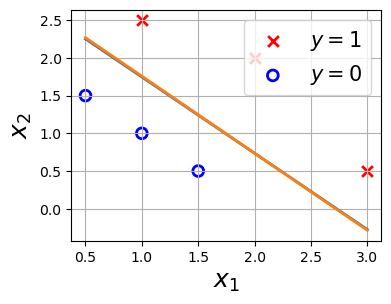

In [68]:
w = lr_model.coef_
b = lr_model.intercept_
visual_data(X_train, y_train)
xx = np.array([X_train.min(), X_train.max()])
# Again, to plot w1*x1 + w2*x2 + b = 0, we need to convert it
# to x2 = -(w1*x1 + b)/w2
yy1 = -(w[0,0]*xx + b[0])/w[0,1]
yy2 = -(w_GD[0]*xx + b_GD)/w_GD[1]
plt.plot(xx, yy1, xx, yy2, lw=2)
plt.show()

In [89]:
np.random.seed(42)
w0 = np.array([12, 12]) + 0.75 * np.random.randn(2)
b0 = np.array([-30]) + 0.75 * np.random.randn(1)
w_GD, b_GD, history = gradient_descent(X_train, y_train, w_init=w0, b_init=b0, alpha=0.25, 
                                       func_value=compute_cost, func_grad=compute_cost_grad, tol=1e-12, maxiters=np.uint32(1e5))

In [90]:
print(w_GD, b_GD)
print(lr_model.coef_, lr_model.intercept_)
print(w_GD / lr_model.coef_, b_GD / lr_model.intercept_)

[11.52597501 11.32224731] [-31.41587056]
[[12.6249161  12.42409086]] [-34.44220213]
[[0.91295458 0.91131395]] [0.91213304]
